Creating a custom dataset for our problem statement

In [1]:
#!pip install albumentations

In [2]:
import joblib
import pandas as pd
from PIL import Image
import albumentations
import numpy as np
import os

In [3]:
import torch
import matplotlib.pyplot as plt

In [4]:
os.chdir("/home/ubuntu/codebase/my_github/kaggle-competitions/human-protein-atlas/approach_2/src/")

In [5]:
class HumanProteinAtlasTrain:
    # folds with have multile values for train, one value for valid
    def __init__(self, folds, img_height, img_width, mean, std):
        df = pd.read_csv("../input/train_folds.csv")
        df.drop("Target", axis=1)
        
        # Let'd filter rows based on kfold
        df = df[df.kfold.isin(folds)].reset_index(drop=True)
        self.image_ids = df.Id.values
        self.nucleoplasmn  = df["Nucleoplasmn"].values
        self.nuclear_membrane  = df["Nuclear membrane"].values
        self.nucleoli  = df["Nucleoli"].values
        self.nucleoli_fibrillar_center  = df["Nucleoli fibrillar center"].values
        self.nuclear_speckles  = df["Nuclear speckles"].values
        self.nuclear_bodies  = df["Nuclear bodies"].values
        self.endoplasmic_reticulum  = df["Endoplasmic reticulum"].values
        self.golgi_apparatus  = df["Golgi apparatus"].values
        self.peroxisomes  = df["Peroxisomes"].values
        self.endosomes  = df["Endosomes"].values
        self.lysosomes  = df["Lysosomes"].values
        self.intermediate_filaments  = df["Intermediate filaments"].values
        self.actin_filaments  = df["Actin filaments"].values
        self.focal_adhesion_sites  = df["Focal adhesion sites"].values
        self.microtubules  = df["Microtubules"].values
        self.microtubule_ends  = df["Microtubule ends"].values
        self.cytokinetic_bridge  = df["Cytokinetic bridge"].values
        self.mitotic_spindle  = df["Mitotic spindle"].values
        self.microtubule_organizing_center  = df["Microtubule organizing center"].values
        self.centrosome  = df["Centrosome"].values
        self.lipid_droplets = df["Lipid droplets"].values
        self.plasma_membrane  = df["Plasma membrane"].values
        self.cell_junctions  = df["Cell junctions"].values
        self.mitochondria  = df["Mitochondria"].values
        self.aggresome  = df["Aggresome"].values
        self.cytosol  = df["Cytosol"].values
        self.cytoplasmic_bodies  = df["Cytoplasmic bodies"].values
        self.rods_rings  = df["Rods & rings"].values

        # We don't want tranforms (other than basic resize and normalize) on validation set
        if len(folds) == 1:
            self.aug = albumentations.Compose([
                # Resize based on input
                albumentations.Resize(img_height, img_width, always_apply=True),
                # Normalize
                albumentations.Normalize(mean, std, always_apply=True)
                
            ])
        else:
            self.aug = albumentations.Compose([
                # Resize based on input
                albumentations.Resize(img_height, img_width, always_apply=True),
                albumentations.ShiftScaleRotate(shift_limit=0.0625,
                                                scale_limit=0.1,
                                                rotate_limit=5,
                                                p=0.9),# apply 90% of the times
                albumentations.HorizontalFlip(p=0.5),
                albumentations.RandomBrightness(p=0.2, limit=0.2), # limit specifies the range
                albumentations.RandomContrast(p=0.1, limit=0.2),
                albumentations.RandomRotate90(p=0.2),
                # Normalize
                albumentations.Normalize(mean, std, always_apply=True)                
            ])
            
        
    def __len__(self):
        return len(self.image_ids)
    
    def __getitem__(self, item):
        #image = joblib.load(f"/home/ubuntu/datasets/human-protein-atlas/train_512by512/{self.image_ids[item]}.png")
        image = Image.open(f"/home/ubuntu/datasets/human-protein-atlas/train_512by512/{self.image_ids[item]}.png").convert("RGB")
        #Image.open(path).convert("RGB")
        #image = Image.fromarray(image)
        # Let's apply the transforms defined in init
        image = self.aug(image=np.array(image))["image"]
        # Transpose the image to fit torch vision channels, so exchange channel locations
        image = np.transpose(image, (2, 0, 1)).astype(np.float32)
        return{
            'image': torch.tensor(image, dtype=torch.float),
            'nucleoplasmn': torch.tensor(self.nucleoplasmn[item], dtype=torch.long),
            'nuclear_membrane': torch.tensor(self.nuclear_membrane[item], dtype=torch.long),
            'nucleoli': torch.tensor(self.nucleoli[item], dtype=torch.long),
            'nucleoli_fibrillar_center': torch.tensor(self.nucleoli_fibrillar_center[item], dtype=torch.long),
            'nuclear_speckles': torch.tensor(self.nuclear_speckles[item], dtype=torch.long),
            'nuclear_bodies': torch.tensor(self.nuclear_bodies[item], dtype=torch.long),
            'endoplasmic_reticulum': torch.tensor(self.endoplasmic_reticulum[item], dtype=torch.long),
            'golgi_apparatus': torch.tensor(self.golgi_apparatus[item], dtype=torch.long),
            'peroxisomes': torch.tensor(self.peroxisomes[item], dtype=torch.long),
            'endosomes': torch.tensor(self.endosomes[item], dtype=torch.long),
            'lysosomes': torch.tensor(self.lysosomes[item], dtype=torch.long),
            'intermediate_filaments': torch.tensor(self.intermediate_filaments[item], dtype=torch.long),
            'actin_filaments': torch.tensor(self.actin_filaments[item], dtype=torch.long),
            'focal_adhesion_sites': torch.tensor(self.focal_adhesion_sites[item] , dtype=torch.long),
            'microtubules': torch.tensor(self.microtubules[item], dtype=torch.long),
            'microtubule_ends': torch.tensor(self.microtubule_ends[item], dtype=torch.long),
            'cytokinetic_bridge': torch.tensor(self.cytokinetic_bridge[item], dtype=torch.long),
            'mitotic_spindle': torch.tensor(self.mitotic_spindle[item], dtype=torch.long),
            'microtubule_organizing_center': torch.tensor(self.microtubule_organizing_center[item], dtype=torch.long),
            'centrosome': torch.tensor(self.centrosome[item], dtype=torch.long),
            'lipid_droplets': torch.tensor(self.lipid_droplets[item], dtype=torch.long),
            'plasma_membrane': torch.tensor(self.plasma_membrane[item], dtype=torch.long),
            'cell_junctions': torch.tensor(self.cell_junctions[item], dtype=torch.long),
            'mitochondria': torch.tensor(self.mitochondria[item], dtype=torch.long),
            'aggresome': torch.tensor(self.aggresome[item], dtype=torch.long),
            'cytosol': torch.tensor(self.cytosol[item], dtype=torch.long),
            'cytoplasmic_bodies': torch.tensor(self.cytoplasmic_bodies[item], dtype=torch.long),
            'rods_rings': torch.tensor(self.rods_rings[item], dtype=torch.long)
        }

In [6]:
dataset = HumanProteinAtlasTrain(folds=[0,1], img_height=512, img_width=512,
                             mean=(0.486, 0.456, 0.406),
                             std=(0.229, 0.224, 0.225))

In [7]:
len(dataset)

12428

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0)
tensor(1)
tensor(0)


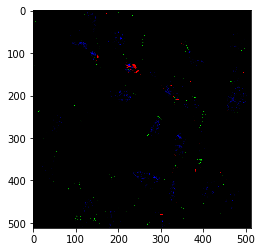

In [8]:
idx = 0
img = dataset[idx]["image"]
print(dataset[idx]["nucleoplasmn"])
print(dataset[idx]["mitochondria"])
print(dataset[idx]["nuclear_bodies"])
# then convert to npimage
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [9]:
dataset.__getitem__(0)

{'image': tensor([[[-2.1223, -2.1223, -2.1051,  ..., -2.0709, -1.8825, -1.8311],
          [-2.1223, -2.1223, -2.1223,  ..., -1.9681, -1.6257, -1.2832],
          [-2.1223, -2.1223, -2.1051,  ..., -1.8311, -1.4715, -1.6428],
          ...,
          [-2.0195, -2.0366, -2.0709,  ..., -2.1223, -2.1223, -2.1223],
          [-1.8654, -1.8996, -1.9681,  ..., -2.1223, -2.1223, -2.1223],
          [-1.6599, -1.8140, -1.7627,  ..., -2.1223, -2.1223, -2.1223]],
 
         [[-1.9832, -2.0182, -2.0182,  ..., -1.9832, -1.8431, -1.9832],
          [-2.0182, -1.9482, -1.9482,  ..., -2.0007, -1.9832, -1.9832],
          [-2.0007, -1.9657, -1.9132,  ..., -1.7906, -1.8606, -1.9482],
          ...,
          [-1.8081, -1.9657, -2.0007,  ..., -2.0357, -2.0357, -2.0357],
          [-1.8431, -1.8431, -1.8606,  ..., -2.0357, -2.0357, -2.0357],
          [-1.5980, -1.8606, -1.8081,  ..., -2.0357, -2.0357, -2.0357]],
 
         [[-1.0027, -1.0201, -1.0201,  ..., -1.8044, -1.8044, -1.8044],
          [-0.7761,

In [10]:
os. getcwd() 

'/home/ubuntu/codebase/my_github/kaggle-competitions/human-protein-atlas/approach_2/src'